C:\Users\Priyanka.M\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.49227724367591147


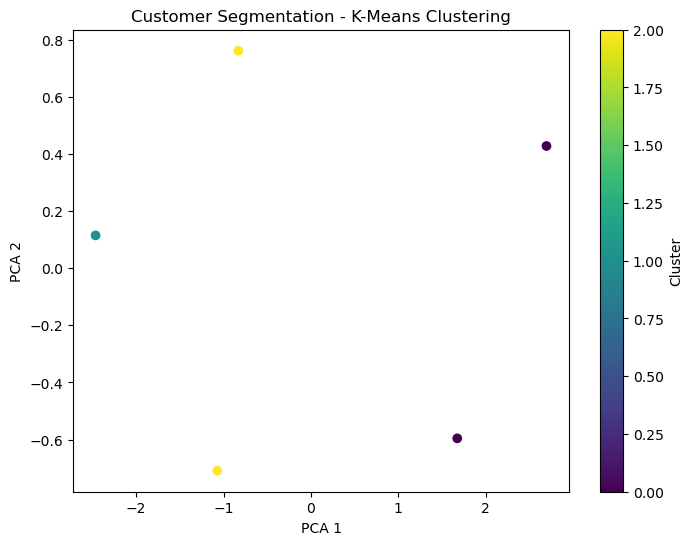

  CustomerID  Age  AnnualIncome  TransactionCount  AvgTransactionValue  \
0       C001   25         50000                 5                  150   
1       C002   34         70000                 8                  200   
2       C003   28         65000                 4                  120   
3       C004   40         80000                10                  180   
4       C005   23         45000                 3                  100   

   Cluster      PCA1      PCA2  
0        2 -1.072322 -0.709108  
1        0  1.673976 -0.595699  
2        2 -0.831557  0.761657  
3        0  2.695452  0.428080  
4        1 -2.465549  0.115071  


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Sample customer data (Replace with actual data)
customer_data = {
    'CustomerID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'Age': [25, 34, 28, 40, 23],
    'AnnualIncome': [50000, 70000, 65000, 80000, 45000],
    'TransactionCount': [5, 8, 4, 10, 3],
    'AvgTransactionValue': [150, 200, 120, 180, 100],
}

# Load customer data into a DataFrame
customers_df = pd.DataFrame(customer_data)

# Select features for clustering
features = customers_df[['Age', 'AnnualIncome', 'TransactionCount', 'AvgTransactionValue']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate Clustering using Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(scaled_features, customers_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Reduce the dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a new DataFrame for visualization
customers_df['PCA1'] = pca_components[:, 0]
customers_df['PCA2'] = pca_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customers_df['PCA1'], customers_df['PCA2'], c=customers_df['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the segmented customer data
print(customers_df)

